# GPU acceleration
If you use Google colab, enable GPU in the environment for faster analysis:

Go to Edit -> Notebook Settings

Hardware Accelerator -> set GPU

# Prepare environment

In [ ]:
!apt-get install git-lfs
!git lfs install
!git clone https://github.com/Ajders1/deepgrain.git
!cp deepgrain/Deepgrain.py .
!cp deepgrain/QA_15a_48.png .
!cp deepgrain/model.torch .
!pip install ttach
!pip install torchmetrics

# Import and settings

In [1]:
import cv2
from tqdm import tqdm
from Deepgrain import Deepgrain

use_tta = True #@param {type:"boolean"}
show_visualizations = True #@param {type:"boolean"}
detailed_visualization = False #@param {type:"boolean"}
save_visualizations = True #@param {type:"boolean"}
imagePath = "QA_15a_48.png" #@param {type:"string"}

2022-11-29 09:49:24.433311: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Initialize deep grain

In [2]:
deepgrain = Deepgrain()

# Run mechanical automatic segmentation

In [3]:
semantic_image = []
semantic_grain = []
semantic_mechanical = []
semantic_grain = []

image_file_path = [imagePath]
for image in tqdm(image_file_path):        
    if use_tta:
        grain, mechanical  = deepgrain.tta_infer(image)
    else:           
        grain, mechanical = deepgrain.infer(image)

    semantic_image.append(cv2.imread(image))
    semantic_mechanical.append(mechanical)
    semantic_grain.append(grain)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.58s/it]


# Draw images

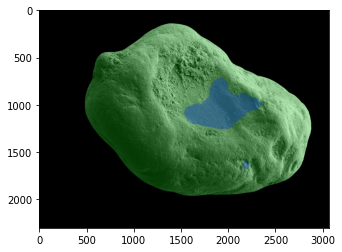

In [4]:
for grain_index, image_path in enumerate(image_file_path):    
    mechanical_count = deepgrain.count_mechanical(semantic_mechanical[grain_index], semantic_grain[grain_index])    
    deepgrain.generateVisualization(image_path, semantic_mechanical[grain_index], semantic_grain[grain_index], mechanical_count, show_visualizations=show_visualizations, detailed_visualization=detailed_visualization, save_visualizations=save_visualizations)